In [ ]:
# Table of Contents

# 01. File operations by Pandas
# 02. Data manipulations by Pandas
## slice data
## add/drop columns
## sort columns
## set operations
# 03. Basic data, data types, data analysis

In [1]:
# 01. File operations by Pandas ###############################################################

import pandas as pd

# load csv into dataFrame
# API, https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# API, https://pandas.pydata.org/docs/reference/api/pandas.read_table.html

df1=pd.read_csv('Data_students.csv', header=0)
print(type(df1))

df2=pd.read_table('Data_students.csv',sep=',', header=0)
print(type(df2))

# show head and tail data
print(df1.head(2))
print(df1.tail(3))
# print(df2.head(2))

# get column names
print('———————————————Column Names———————————————————')
print(df1.columns)
print(type(df1.columns)) # by default, they are index

# convert column names to list
col_list = df1.columns.tolist()
print('\n',col_list)
print(type(col_list)) # it is list now


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
   ID Nationality  Gender   Age Degree  Hours on Readings  \
0   1       China       1  23.0    PHD                  9   
1   2       China       1  21.0    PHD                  9   

   Hours on Assignments  Hours on Games  Hours on Internet   Exam  Grade  \
0                   2.0             2.0                 11  81.80  79.50   
1                   2.0             2.0                 11  88.96  88.46   

  GradeLetter  
0           B  
1           A  
    ID Nationality  Gender   Age Degree  Hours on Readings  \
27  28       India       1  24.0     MS                  3   
28  29       India       1  24.0     MS                  3   
29  30       India       1  20.0     MS                  3   

    Hours on Assignments  Hours on Games  Hours on Internet   Exam  Grade  \
27                   8.0            13.0                  1  55.13  61.01   
28                   8.0            13.0                  1 

In [99]:
# 02. Data manipulations by Pandas ###############################################################

print('———————————————Slicing Data———————————————————')

# select data by rows
print('\nselect data by row index')
print(df1[1:3]) # get rows with index [1, 3)
print('\nBy iloc\n',df1.iloc[1:3]) # get rows with index [1, 3)

print('————————————')

# select data by columns
print(df1.columns)

# by column names
print('\nselect data by column names')
cols = ['Age','Gender','Grade']
print(df1[cols].head(5))

print('————————————')

# by column index
print('\nselect data by column index')
cols = [2, 1, 3]
print(df1.iloc[:,cols].head(5))

print('————————————')

# by row and column index
print('\nselect data by row and column index')
rows = [0,1,4]
cols = [2, 1, 3]
print(df1.iloc[rows,cols])

# by row index and column names
print('\nselect data by row and column index')
rows = [0,1,4]
cols = ['Age','Gender','Nationality']
print(df1[cols].iloc[rows])

print('————————————')

# select data by conditions

print('\nSelect students with age <20, \noutput their age, gender, nationality only\n')
print(df1[df1['Age']<20][cols])

print('\nSelect students who are from China and Spain, \noutput their age, gender, nationality only\n')
options=[' China', ' Spain'] # note, in the column of nationality, there is a space in front of the values, such as ' China'
print(df1[df1['Nationality'].isin(options)][cols])

print('\nSelect students who are from China and Spain, and younger than 20, \noutput their age, gender, nationality only\n')
options=[' China', ' Spain'] # note, in the column of nationality, there is a space in front of the values, such as ' China'
print(df1[(df1['Age']<20) & df1['Nationality'].isin(options)][cols])

print('\nSelect female students who are from China, Spain and France, and younger than 20, \noutput their age, gender, nationality only\n')
options=[' China', ' Spain',' France'] # note, in the column of nationality, there is a space in front of the values, such as ' China'
print(df1[(df1['Gender']==0) & (df1['Age']<20) & df1['Nationality'].isin(options)][cols])

———————————————Slicing Data———————————————————

select data by row index
   ID Nationality  Gender   Age Degree  Hours on Readings  \
1   2       China       1  21.0    PHD                  9   
2   3       China       1  24.0    PHD                  9   

   Hours on Assignments  Hours on Games  Hours on Internet   Exam  Grade  \
1                   2.0             2.0                 11  88.96  88.46   
2                   2.0             2.0                 11  88.16  87.00   

  GradeLetter  
1           A  
2           B  

By iloc
    ID Nationality  Gender   Age Degree  Hours on Readings  \
1   2       China       1  21.0    PHD                  9   
2   3       China       1  24.0    PHD                  9   

   Hours on Assignments  Hours on Games  Hours on Internet   Exam  Grade  \
1                   2.0             2.0                 11  88.96  88.46   
2                   2.0             2.0                 11  88.16  87.00   

  GradeLetter  
1           A  
2          

In [100]:
df2 = df1[['Age', 'Nationality', 'Gender']]
print(df2.columns)
print(df2.head(5))

# copy one column and add it to dataframe
print('\ncopy one column and add it to dataframe\n')
df2['Age2']=df2['Age']
df2['Gender2']=df2['Gender']
print(df2.head(5))

# drop columns from dataframe
print('\ndrop columns from dataframe\n')
df2=df2.drop(['Age2','Gender2'], axis=1)
print(df2.head(5))

# add new columns to dataframe
print('\nadd new columns to dataframee\n')
import random
#Generate 30 random numbers between 10 and 30
GPA = random.choices(range(1,4), k=30)

df2['GPA']=GPA
print(df2.head(5))

Index(['Age', 'Nationality', 'Gender'], dtype='object')
    Age Nationality  Gender
0  23.0       China       1
1  21.0       China       1
2  24.0       China       1
3  20.0       India       1
4  22.0       China       1

copy one column and add it to dataframe

    Age Nationality  Gender  Age2  Gender2
0  23.0       China       1  23.0        1
1  21.0       China       1  21.0        1
2  24.0       China       1  24.0        1
3  20.0       India       1  20.0        1
4  22.0       China       1  22.0        1

drop columns from dataframe

    Age Nationality  Gender
0  23.0       China       1
1  21.0       China       1
2  24.0       China       1
3  20.0       India       1
4  22.0       China       1

add new columns to dataframee

    Age Nationality  Gender  GPA
0  23.0       China       1    2
1  21.0       China       1    3
2  24.0       China       1    1
3  20.0       India       1    2
4  22.0       China       1    2


C:\Users\Yong\AppData\Local\Temp\ipykernel_14772\1622513399.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age2']=df2['Age']
C:\Users\Yong\AppData\Local\Temp\ipykernel_14772\1622513399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender2']=df2['Gender']


In [112]:
# sort columns

import copy

df2 = df1[['Age', 'Nationality', 'Gender']]
df2 = copy.deepcopy(df2)
print(df2.head(5))

df3 = df2.head(5).sort_values(by=['Age'], ascending=True)
print(df3)

df4 = df2.head(5).sort_values(by=['Age'], ascending=False)
print(df4)

    Age Nationality  Gender
0  23.0       China       1
1  21.0       China       1
2  24.0       China       1
3  20.0       India       1
4  22.0       China       1
    Age Nationality  Gender
3  20.0       India       1
1  21.0       China       1
4  22.0       China       1
0  23.0       China       1
2  24.0       China       1
    Age Nationality  Gender
2  24.0       China       1
0  23.0       China       1
4  22.0       China       1
1  21.0       China       1
3  20.0       India       1


In [113]:
# set operations

import copy

df2 = df1[['Age', 'Nationality', 'Gender']]
df2 = copy.deepcopy(df2)
df3 = df2.iloc[[1,2,3,4,5]]
df4 = df2.iloc[[1,2,5,6,7]]

print(df3)
print('\n',df4)

print('--------------------------------------------\n')

# append = merge vertically
df = df3.append(df4)
print(df3)
print('\n',df)

print('--------------------------------------------\n')

# concat = you can merge vertically or horizontally, you cannot assign keys
dfs = [df3, df4]
df = pd.concat(dfs, axis=1) #horizontally
print('\n',df)
df = pd.concat(dfs, axis=0) #vertically
print('\n',df)

print('--------------------------------------------\n')

# merge =  merge horizontally, you can assign keys
# merge, how = {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}
df = pd.merge(df3, df4, how='inner') # you can also assign keys, such as on='Age'
print('\n',df)
df = pd.merge(df3, df4, how='inner', on='Age')
print('\n',df)

    Age Nationality  Gender
1  21.0       China       1
2  24.0       China       1
3  20.0       India       1
4  22.0       China       1
5  18.0       China       1

     Age Nationality  Gender
1  21.0       China       1
2  24.0       China       1
5  18.0       China       1
6  25.0       China       1
7  19.0       China       1
--------------------------------------------

    Age Nationality  Gender
1  21.0       China       1
2  24.0       China       1
3  20.0       India       1
4  22.0       China       1
5  18.0       China       1

     Age Nationality  Gender
1  21.0       China       1
2  24.0       China       1
3  20.0       India       1
4  22.0       China       1
5  18.0       China       1
1  21.0       China       1
2  24.0       China       1
5  18.0       China       1
6  25.0       China       1
7  19.0       China       1
--------------------------------------------


     Age Nationality  Gender   Age Nationality  Gender
1  21.0       China     1.0  21.0   

C:\Users\Yong\AppData\Local\Temp\ipykernel_14772\18874998.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df3.append(df4)


ID                        int64
Nationality              object
Gender                    int64
Age                     float64
Degree                   object
Hours on Readings         int64
Hours on Assignments    float64
Hours on Games          float64
Hours on Internet         int64
Exam                    float64
Grade                   float64
GradeLetter              object
dtype: object

Class frequency:
  PHD    17
 MS      7
 BS      6
Name: Degree, dtype: int64 

Class relative frequency:
  PHD    0.566667
 MS     0.233333
 BS     0.200000
Name: Degree, dtype: float64

 cf_dict:  {' PHD': 17, ' MS': 7, ' BS': 6}


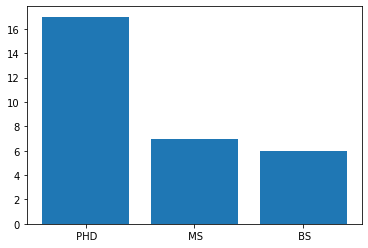

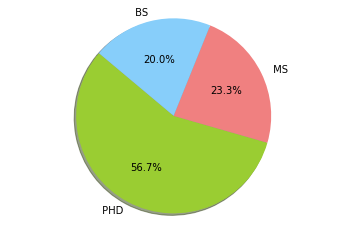


Data descriptions
              ID     Gender        Age  Hours on Readings  \
count  30.000000  30.000000  28.000000          30.000000   
mean   15.500000   0.766667  21.892857           6.966667   
std     8.803408   0.430183   2.780078           4.627380   
min     1.000000   0.000000  18.000000           2.000000   
25%     8.250000   1.000000  19.750000           3.000000   
50%    15.500000   1.000000  22.000000           9.000000   
75%    22.750000   1.000000  24.000000           9.000000   
max    30.000000   1.000000  26.000000          14.000000   

       Hours on Assignments  Hours on Games  Hours on Internet       Exam  \
count             29.000000       29.000000          30.000000  28.000000   
mean               5.517241        8.827586           4.500000  77.860714   
std                2.707406        5.007630           4.783232  17.925934   
min                2.000000        2.000000           0.000000  42.510000   
25%                2.000000        2.000000   

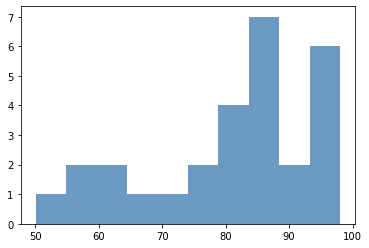

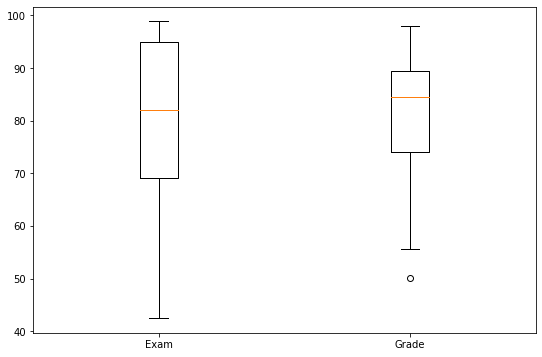

In [91]:
# 03. Basic data, data types, data analysis ##################################################
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df=pd.read_csv('Data_students.csv', header=0)

print(df.dtypes)

# descriptive statistics for nominal variables by using Degree for example #################################################
cf=df['Degree'].value_counts()
crf=df['Degree'].value_counts()/df.shape[0]
print("\nClass frequency:\n", cf, "\n\nClass relative frequency:\n", crf)

cf_dict = cf.to_dict()
crf_dict = crf.to_dict()
print("\n cf_dict: ", cf_dict)

# bar graph
plt.bar(range(len(cf_dict)), list(cf_dict.values()), align='center')
plt.xticks(range(len(cf_dict)), list(cf_dict.keys()))
plt.show()

# Pie chart
labels =  list(crf_dict.keys())
sizes = list(crf_dict.values())
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


# descriptive statistics for numerical variables by using Exam and Grade for example #################################################
description = df.describe()
print("\nData descriptions")
print(description)


# histogram
grade=df['Grade'].dropna()
exam=df['Exam'].dropna()
fig = plt.figure()
ax = plt.axes()
plt.hist(grade, bins=10, alpha=0.8, color='steelblue', edgecolor='none', histtype='stepfilled')
plt.show()


# boxplot
data_to_plot = [exam, grade]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.xticks([1,2], ['Exam', 'Grade'])
plt.show()